## Configuration

Specify the path to your CSV file and whether it's a full or minimal export.

In [36]:
# Configuration Parameters
CSV_FILE_PATH = r"results_20251123_114449\all_games_minimal.csv"  # Update this path
CSV_TYPE = "minimal"  # Options: "full" or "minimal"
INCLUDE_OT_GAMES = False  # Set to False to exclude overtime games

## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("Libraries imported successfully")

Libraries imported successfully


## Load and Prepare Data

In [38]:
# Load CSV data
df = pd.read_csv(CSV_FILE_PATH, sep=';')

print(f"Loaded {len(df)} rows from {CSV_FILE_PATH}")
print(f"\nColumns available: {list(df.columns)}")
print(f"\nNumber of unique games: {df['game_id'].nunique()}")
print(f"\nFirst few rows:")
df.head()

Loaded 275995 rows from results_20251123_114449\all_games_minimal.csv

Columns available: ['round_number', 'is_t1_winner', 'is_t1_ct', 'is_ot', 'outcome_reason_code', 'outcome_bomb_planted', 't1_score_start', 't1_score_end', 't1_spent', 't1_earned', 't1_funds_start', 't1_rs_eq', 't1_fte_eq', 't1_re_eq', 't1_survivors', 't1_consecutive_losses', 't1_consecutive_wins', 't1_loss_bonus_level', 't2_score_start', 't2_score_end', 't2_spent', 't2_earned', 't2_funds_start', 't2_rs_eq', 't2_fte_eq', 't2_re_eq', 't2_survivors', 't2_consecutive_losses', 't2_consecutive_wins', 't2_loss_bonus_level', 'game_id']

Number of unique games: 10000

First few rows:


,round_number,is_t1_winner,is_t1_ct,is_ot,outcome_reason_code,outcome_bomb_planted,t1_score_start,t1_score_end,t1_spent,t1_earned,...,t2_earned,t2_funds_start,t2_rs_eq,t2_fte_eq,t2_re_eq,t2_survivors,t2_consecutive_losses,t2_consecutive_wins,t2_loss_bonus_level,game_id
0,1,True,False,False,1,True,0,1,4000.0,19000.0,...,9800.0,4000.0,1000.0,5000.0,829.0,1,1,0,2,sim_6_20251123_114449_DPE1-2_1333
1,2,True,False,False,2,True,1,2,19000.0,18050.0,...,12600.0,9800.0,1629.0,11429.0,0.0,0,2,0,3,sim_6_20251123_114449_DPE1-2_1333
2,3,True,False,False,2,True,2,3,18050.0,18050.0,...,15400.0,12600.0,1000.0,13600.0,0.0,0,3,0,4,sim_6_20251123_114449_DPE1-2_1333
3,4,True,False,False,2,True,3,4,18050.0,18050.0,...,17900.0,15400.0,1000.0,16400.0,0.0,0,4,0,4,sim_6_20251123_114449_DPE1-2_1333
4,5,True,False,False,1,True,4,5,18050.0,18700.0,...,18200.0,17900.0,1000.0,18900.0,4068.0,2,5,0,4,sim_6_20251123_114449_DPE1-2_1333


## Filter Data

In [39]:
# Apply OT filter
if not INCLUDE_OT_GAMES:
    df_filtered = df[df['is_ot'] == False].copy()
    print(f"Filtered out OT games. Remaining rows: {len(df_filtered)}")
else:
    df_filtered = df.copy()
    print(f"Including all games (with OT). Total rows: {len(df_filtered)}")

print(f"\nGames after filter: {df_filtered['game_id'].nunique()}")
print(f"Rounds with OT: {df_filtered['is_ot'].sum()}")
print(f"Rounds without OT: {(~df_filtered['is_ot']).sum()}")

Filtered out OT games. Remaining rows: 229984

Games after filter: 8759
Rounds with OT: 0
Rounds without OT: 229984


## Data Summary Statistics

In [40]:
# Summary statistics
print("=" * 60)
print("ECONOMIC METRICS SUMMARY")
print("=" * 60)

# Team 1 statistics
print("\nTeam 1:")
print(f"  Avg Starting Funds: ${df_filtered['t1_funds_start'].mean():.2f}")
print(f"  Avg FTE Equipment: ${df_filtered['t1_fte_eq'].mean():.2f}")
print(f"  Avg Spent per Round: ${df_filtered['t1_spent'].mean():.2f}")
print(f"  Avg Earned per Round: ${df_filtered['t1_earned'].mean():.2f}")

# Team 2 statistics
print("\nTeam 2:")
print(f"  Avg Starting Funds: ${df_filtered['t2_funds_start'].mean():.2f}")
print(f"  Avg FTE Equipment: ${df_filtered['t2_fte_eq'].mean():.2f}")
print(f"  Avg Spent per Round: ${df_filtered['t2_spent'].mean():.2f}")
print(f"  Avg Earned per Round: ${df_filtered['t2_earned'].mean():.2f}")

print("\n" + "=" * 60)

ECONOMIC METRICS SUMMARY

Team 1:
  Avg Starting Funds: $14967.09
  Avg FTE Equipment: $23903.48
  Avg Spent per Round: $14967.09
  Avg Earned per Round: $15918.72

Team 2:
  Avg Starting Funds: $14972.84
  Avg FTE Equipment: $23857.65
  Avg Spent per Round: $14972.84
  Avg Earned per Round: $15918.56



## Visualization 1: Starting Funds by Round

C:\Users\peter\AppData\Local\Temp\ipykernel_28988\1623868064.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


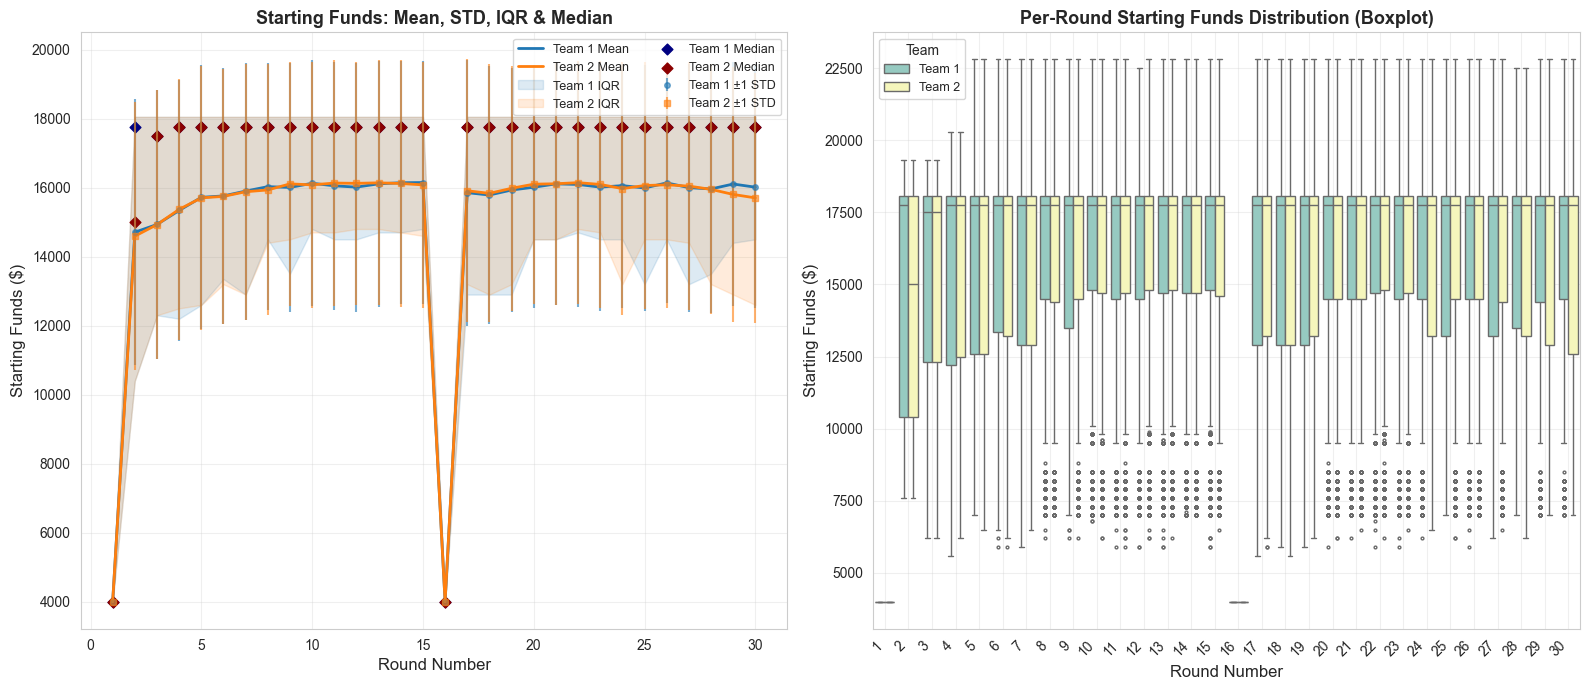

Starting Funds Per-Round Summary (first 20 rows):
    round_number    team          mean          std      q25   median      q75
0              1  Team 1   4000.000000     0.000000   4000.0   4000.0   4000.0
1              1  Team 2   4000.000000     0.000000   4000.0   4000.0   4000.0
2              2  Team 1  14707.780569  3857.560311  10400.0  17750.0  18050.0
3              2  Team 2  14591.682841  3884.977326  10400.0  15000.0  18050.0
4              3  Team 1  14930.893938  3904.249623  12300.0  17500.0  18050.0
5              3  Team 2  14927.388971  3888.338697  12300.0  17500.0  18050.0
6              4  Team 1  15336.745062  3780.419833  12200.0  17750.0  18050.0
7              4  Team 2  15368.883434  3771.863065  12500.0  17750.0  18050.0
8              5  Team 1  15717.387830  3820.913829  12600.0  17750.0  18050.0
9              5  Team 2  15701.883777  3833.335485  12600.0  17750.0  18050.0
10             6  Team 1  15758.613997  3704.858428  13350.0  17750.0  18050.0
11

In [41]:
# Enhanced Visualization: Starting Funds by Round
# Mirrors equipment value visualization: mean + std + IQR + median & per-round boxplots.

# Raw per-round starting funds values
funds_raw = df_filtered[['round_number', 't1_funds_start', 't2_funds_start']].copy()

# Melt for boxplots
funds_long = funds_raw.melt(id_vars='round_number', value_vars=['t1_funds_start','t2_funds_start'],
                            var_name='team', value_name='funds_start')
funds_long['team'] = funds_long['team'].map({'t1_funds_start':'Team 1','t2_funds_start':'Team 2'})

# Compute stats per round
funds_stats = funds_long.groupby(['round_number','team']).agg(
    mean=('funds_start','mean'),
    std=('funds_start','std'),
    q25=('funds_start', lambda x: x.quantile(0.25)),
    median=('funds_start','median'),
    q75=('funds_start', lambda x: x.quantile(0.75))
).reset_index()

funds_stats['std'] = funds_stats['std'].fillna(0)  # handle single observations

stats_t1_funds = funds_stats[funds_stats['team']=='Team 1']
stats_t2_funds = funds_stats[funds_stats['team']=='Team 2']

fig = plt.figure(figsize=(16, 7))

# Subplot 1: Mean line with STD error bars & IQR shading
ax1 = plt.subplot(1,2,1)
ax1.plot(stats_t1_funds['round_number'], stats_t1_funds['mean'], label='Team 1 Mean', color='tab:blue', linewidth=2)
ax1.plot(stats_t2_funds['round_number'], stats_t2_funds['mean'], label='Team 2 Mean', color='tab:orange', linewidth=2)

ax1.fill_between(stats_t1_funds['round_number'], stats_t1_funds['q25'], stats_t1_funds['q75'], color='tab:blue', alpha=0.15, label='Team 1 IQR')
ax1.fill_between(stats_t2_funds['round_number'], stats_t2_funds['q25'], stats_t2_funds['q75'], color='tab:orange', alpha=0.15, label='Team 2 IQR')

ax1.errorbar(stats_t1_funds['round_number'], stats_t1_funds['mean'], yerr=stats_t1_funds['std'], fmt='o', color='tab:blue', alpha=0.6, markersize=4,
             label='Team 1 ±1 STD')
ax1.errorbar(stats_t2_funds['round_number'], stats_t2_funds['mean'], yerr=stats_t2_funds['std'], fmt='s', color='tab:orange', alpha=0.6, markersize=4,
             label='Team 2 ±1 STD')

ax1.scatter(stats_t1_funds['round_number'], stats_t1_funds['median'], color='navy', marker='D', s=30, label='Team 1 Median')
ax1.scatter(stats_t2_funds['round_number'], stats_t2_funds['median'], color='darkred', marker='D', s=30, label='Team 2 Median')

ax1.set_xlabel('Round Number', fontsize=12)
ax1.set_ylabel('Starting Funds ($)', fontsize=12)
ax1.set_title('Starting Funds: Mean, STD, IQR & Median', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend(fontsize=9, ncol=2)

# Subplot 2: Boxplots per round
ax2 = plt.subplot(1,2,2)
sns.boxplot(data=funds_long, x='round_number', y='funds_start', hue='team', ax=ax2, width=0.8, fliersize=2)
ax2.set_xlabel('Round Number', fontsize=12)
ax2.set_ylabel('Starting Funds ($)', fontsize=12)
ax2.set_title('Per-Round Starting Funds Distribution (Boxplot)', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.legend(title='Team', fontsize=9)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print('Starting Funds Per-Round Summary (first 20 rows):')
print(funds_stats.head(20))

## Visualization 2: FTE Equipment Value by Round

C:\Users\peter\AppData\Local\Temp\ipykernel_28988\3265711335.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


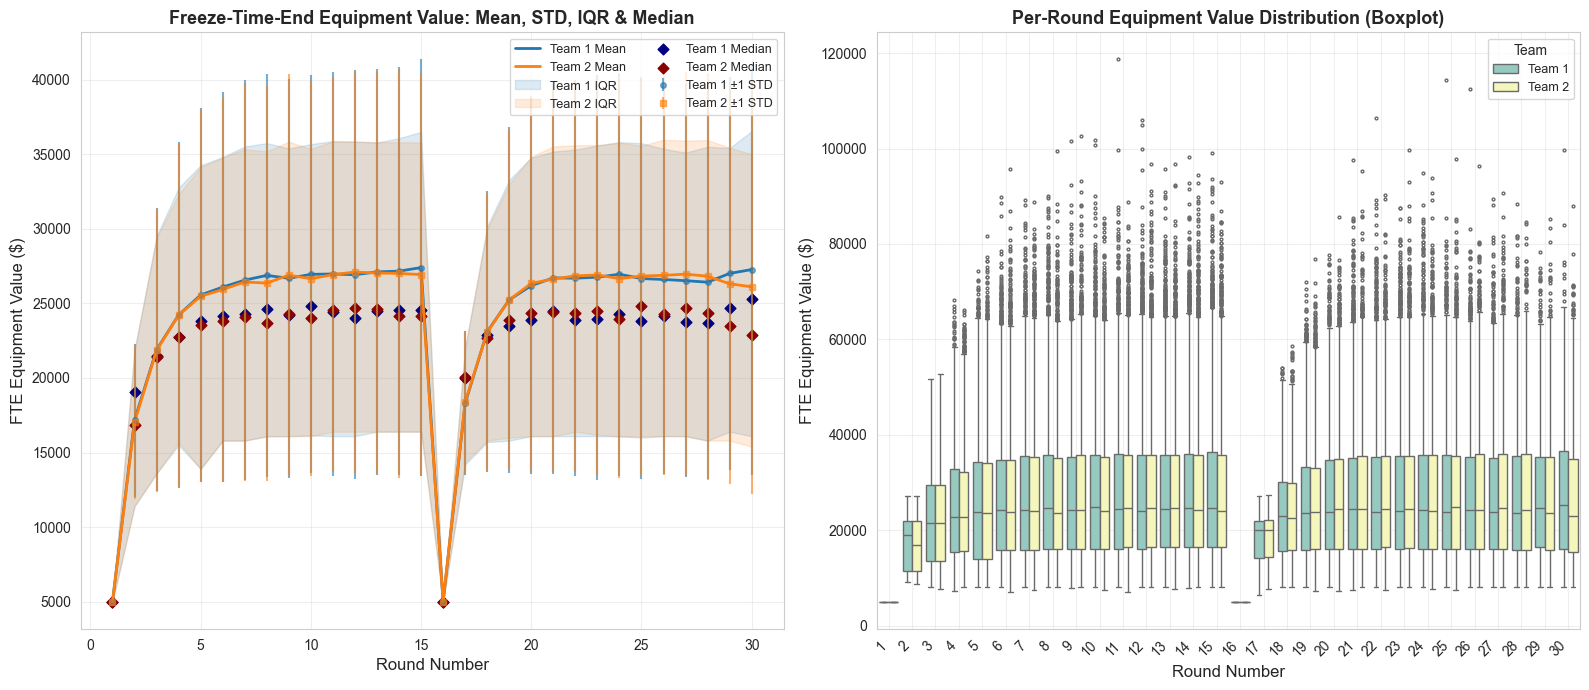

Per-Round Summary (first 10 rounds):
    round_number    team          mean           std      q25   median  \
0              1  Team 1   5000.000000      0.000000   5000.0   5000.0   
1              1  Team 2   5000.000000      0.000000   5000.0   5000.0   
2              2  Team 1  17173.902500   5128.834536  11400.0  19050.0   
3              2  Team 2  17037.016098   5161.739658  11400.0  16826.0   
4              3  Team 1  21891.389428   9498.764511  13600.0  21490.0   
5              3  Team 2  21850.032995   9503.110092  13600.0  21420.0   
6              4  Team 1  24220.224455  11564.939459  15500.0  22748.0   
7              4  Team 2  24207.901130  11542.276624  15700.0  22732.0   
8              5  Team 1  25562.304715  12541.331733  13900.0  23793.0   
9              5  Team 2  25475.441945  12458.600450  13900.0  23540.0   
10             6  Team 1  26089.969745  13067.917131  15800.0  24183.0   
11             6  Team 2  25931.465236  12926.592063  15800.0  23800.0   
1

In [42]:
# Enhanced Visualization: FTE Equipment Value by Round
# Provides both (1) mean with std + interquartile range shading and (2) boxplots per round per team.

# Prepare per-round distributions (no aggregation yet)
fte_raw = df_filtered[['round_number', 't1_fte_eq', 't2_fte_eq']].copy()

# Melt into long form for boxplot
fte_long = fte_raw.melt(id_vars='round_number', value_vars=['t1_fte_eq','t2_fte_eq'],
                        var_name='team', value_name='fte_eq')
fte_long['team'] = fte_long['team'].map({'t1_fte_eq':'Team 1','t2_fte_eq':'Team 2'})

# Compute per-round stats
stats = fte_long.groupby(['round_number','team']).agg(
    mean=('fte_eq','mean'),
    std=('fte_eq','std'),
    q25=('fte_eq', lambda x: x.quantile(0.25)),
    median=('fte_eq','median'),
    q75=('fte_eq', lambda x: x.quantile(0.75))
).reset_index()

# Split stats for plotting
stats_t1 = stats[stats['team']=='Team 1']
stats_t2 = stats[stats['team']=='Team 2']

fig = plt.figure(figsize=(16, 7))

# Subplot 1: Mean line with STD error bars and IQR shading
ax1 = plt.subplot(1,2,1)
ax1.plot(stats_t1['round_number'], stats_t1['mean'], label='Team 1 Mean', color='tab:blue', linewidth=2)
ax1.plot(stats_t2['round_number'], stats_t2['mean'], label='Team 2 Mean', color='tab:orange', linewidth=2)

# IQR shading
ax1.fill_between(stats_t1['round_number'], stats_t1['q25'], stats_t1['q75'], color='tab:blue', alpha=0.15, label='Team 1 IQR')
ax1.fill_between(stats_t2['round_number'], stats_t2['q25'], stats_t2['q75'], color='tab:orange', alpha=0.15, label='Team 2 IQR')

# STD error bars (use scatter with errorbars for clarity)
ax1.errorbar(stats_t1['round_number'], stats_t1['mean'], yerr=stats_t1['std'], fmt='o', color='tab:blue', alpha=0.6, markersize=4,
             label='Team 1 ±1 STD')
ax1.errorbar(stats_t2['round_number'], stats_t2['mean'], yerr=stats_t2['std'], fmt='s', color='tab:orange', alpha=0.6, markersize=4,
             label='Team 2 ±1 STD')

# Median markers
ax1.scatter(stats_t1['round_number'], stats_t1['median'], color='navy', marker='D', s=30, label='Team 1 Median')
ax1.scatter(stats_t2['round_number'], stats_t2['median'], color='darkred', marker='D', s=30, label='Team 2 Median')

ax1.set_xlabel('Round Number', fontsize=12)
ax1.set_ylabel('FTE Equipment Value ($)', fontsize=12)
ax1.set_title('Freeze-Time-End Equipment Value: Mean, STD, IQR & Median', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend(fontsize=9, ncol=2)

# Subplot 2: Boxplots per round
ax2 = plt.subplot(1,2,2)
# To avoid overcrowding if many rounds, optionally sample rounds (leave as-is for completeness)
sns.boxplot(data=fte_long, x='round_number', y='fte_eq', hue='team', ax=ax2, width=0.8, fliersize=2)
ax2.set_xlabel('Round Number', fontsize=12)
ax2.set_ylabel('FTE Equipment Value ($)', fontsize=12)
ax2.set_title('Per-Round Equipment Value Distribution (Boxplot)', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.legend(title='Team', fontsize=9)
# Improve readability: rotate round labels if many
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Optional: Display summary table for verification
print('Per-Round Summary (first 10 rounds):')
print(stats.head(20))

C:\Users\peter\AppData\Local\Temp\ipykernel_28988\3779924416.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


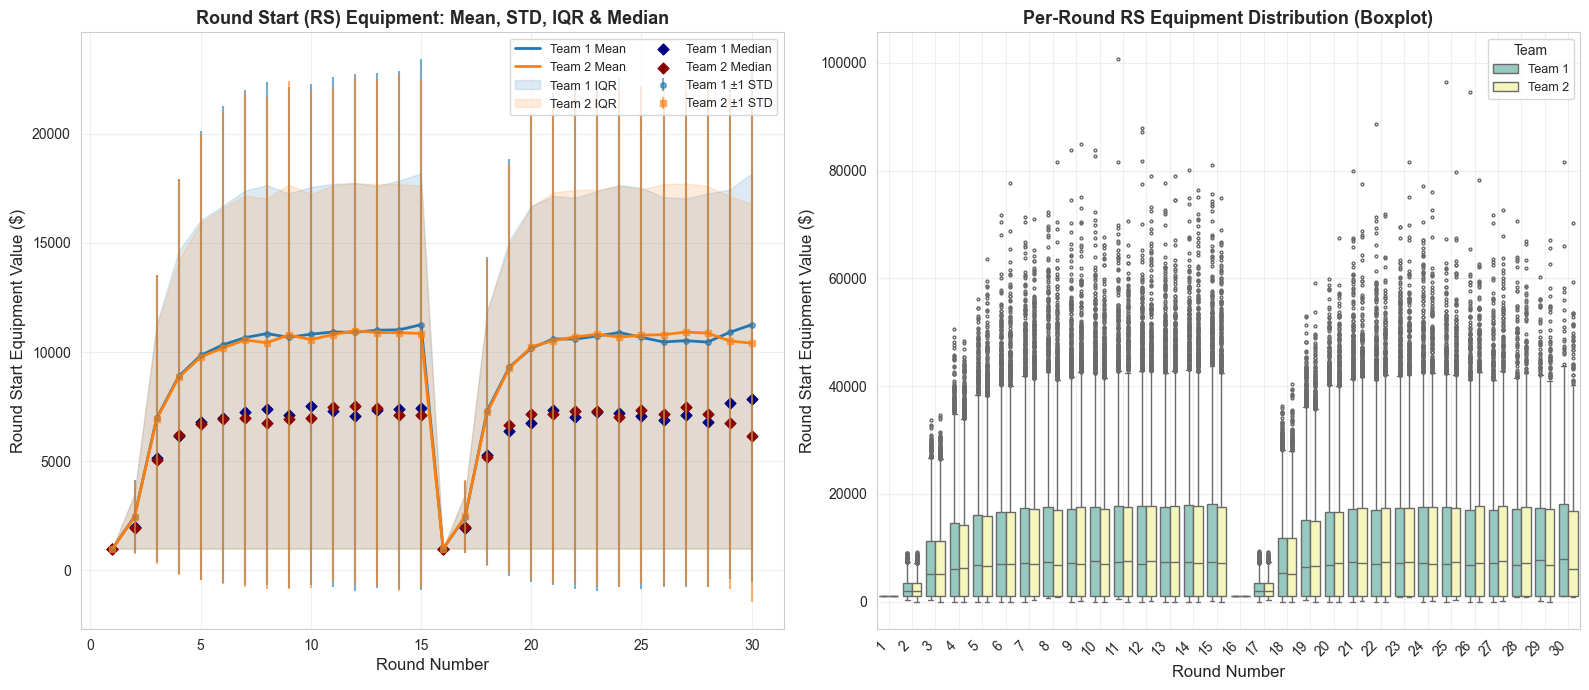

RS Equipment Per-Round Summary (first 20 rows):
    round_number    team          mean           std     q25  median      q75
0              1  Team 1   1000.000000      0.000000  1000.0  1000.0   1000.0
1              1  Team 2   1000.000000      0.000000  1000.0  1000.0   1000.0
2              2  Team 1   2466.121932   1663.004071  1000.0  1987.0   3521.0
3              2  Team 2   2445.333257   1673.628168  1000.0  1932.0   3494.0
4              3  Team 1   6960.495490   6584.698036  1000.0  5140.0  11264.5
5              3  Team 2   6922.644023   6606.992460  1000.0  5075.0  11193.5
6              4  Team 1   8883.479393   9034.850822  1000.0  6147.0  14627.0
7              4  Team 2   8839.017696   9069.197269  1000.0  6191.0  14197.5
8              5  Team 1   9844.916885  10282.771258  1000.0  6779.0  16033.5
9              5  Team 2   9773.558169  10219.045040  1000.0  6715.0  15900.0
10             6  Team 1  10331.355748  10925.224806  1000.0  6967.0  16691.5
11             6

In [43]:
# Visualization 2b: Round Start (RS) Equipment Value by Round
# Mirrors the FTE equipment visualization: mean/std/IQR/median + boxplots.

# Ensure columns exist (minimal vs full export naming)
rs_t1_col = 't1_rs_eq' if 't1_rs_eq' in df_filtered.columns else 't1_rs_eq_value'
rs_t2_col = 't2_rs_eq' if 't2_rs_eq' in df_filtered.columns else 't2_rs_eq_value'

rs_raw = df_filtered[['round_number', rs_t1_col, rs_t2_col]].copy()
rs_raw.rename(columns={rs_t1_col: 't1_rs_eq', rs_t2_col: 't2_rs_eq'}, inplace=True)

# Melt for boxplots
rs_long = rs_raw.melt(id_vars='round_number', value_vars=['t1_rs_eq','t2_rs_eq'],
                      var_name='team', value_name='rs_eq')
rs_long['team'] = rs_long['team'].map({'t1_rs_eq':'Team 1','t2_rs_eq':'Team 2'})

# Stats per round
rs_stats = rs_long.groupby(['round_number','team']).agg(
    mean=('rs_eq','mean'),
    std=('rs_eq','std'),
    q25=('rs_eq', lambda x: x.quantile(0.25)),
    median=('rs_eq','median'),
    q75=('rs_eq', lambda x: x.quantile(0.75))
).reset_index()
rs_stats['std'] = rs_stats['std'].fillna(0)
rs_t1 = rs_stats[rs_stats['team']=='Team 1']
rs_t2 = rs_stats[rs_stats['team']=='Team 2']

fig = plt.figure(figsize=(16,7))
# Subplot 1
ax1 = plt.subplot(1,2,1)
ax1.plot(rs_t1['round_number'], rs_t1['mean'], label='Team 1 Mean', color='tab:blue', linewidth=2)
ax1.plot(rs_t2['round_number'], rs_t2['mean'], label='Team 2 Mean', color='tab:orange', linewidth=2)
ax1.fill_between(rs_t1['round_number'], rs_t1['q25'], rs_t1['q75'], color='tab:blue', alpha=0.15, label='Team 1 IQR')
ax1.fill_between(rs_t2['round_number'], rs_t2['q25'], rs_t2['q75'], color='tab:orange', alpha=0.15, label='Team 2 IQR')
ax1.errorbar(rs_t1['round_number'], rs_t1['mean'], yerr=rs_t1['std'], fmt='o', color='tab:blue', alpha=0.6, markersize=4, label='Team 1 ±1 STD')
ax1.errorbar(rs_t2['round_number'], rs_t2['mean'], yerr=rs_t2['std'], fmt='s', color='tab:orange', alpha=0.6, markersize=4, label='Team 2 ±1 STD')
ax1.scatter(rs_t1['round_number'], rs_t1['median'], color='navy', marker='D', s=30, label='Team 1 Median')
ax1.scatter(rs_t2['round_number'], rs_t2['median'], color='darkred', marker='D', s=30, label='Team 2 Median')
ax1.set_xlabel('Round Number', fontsize=12)
ax1.set_ylabel('Round Start Equipment Value ($)', fontsize=12)
ax1.set_title('Round Start (RS) Equipment: Mean, STD, IQR & Median', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend(fontsize=9, ncol=2)

# Subplot 2 boxplots
ax2 = plt.subplot(1,2,2)
sns.boxplot(data=rs_long, x='round_number', y='rs_eq', hue='team', ax=ax2, width=0.8, fliersize=2)
ax2.set_xlabel('Round Number', fontsize=12)
ax2.set_ylabel('Round Start Equipment Value ($)', fontsize=12)
ax2.set_title('Per-Round RS Equipment Distribution (Boxplot)', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.legend(title='Team', fontsize=9)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print('RS Equipment Per-Round Summary (first 20 rows):')
print(rs_stats.head(20))

## Visualization 3: Economic Flow (Spent vs Earned)

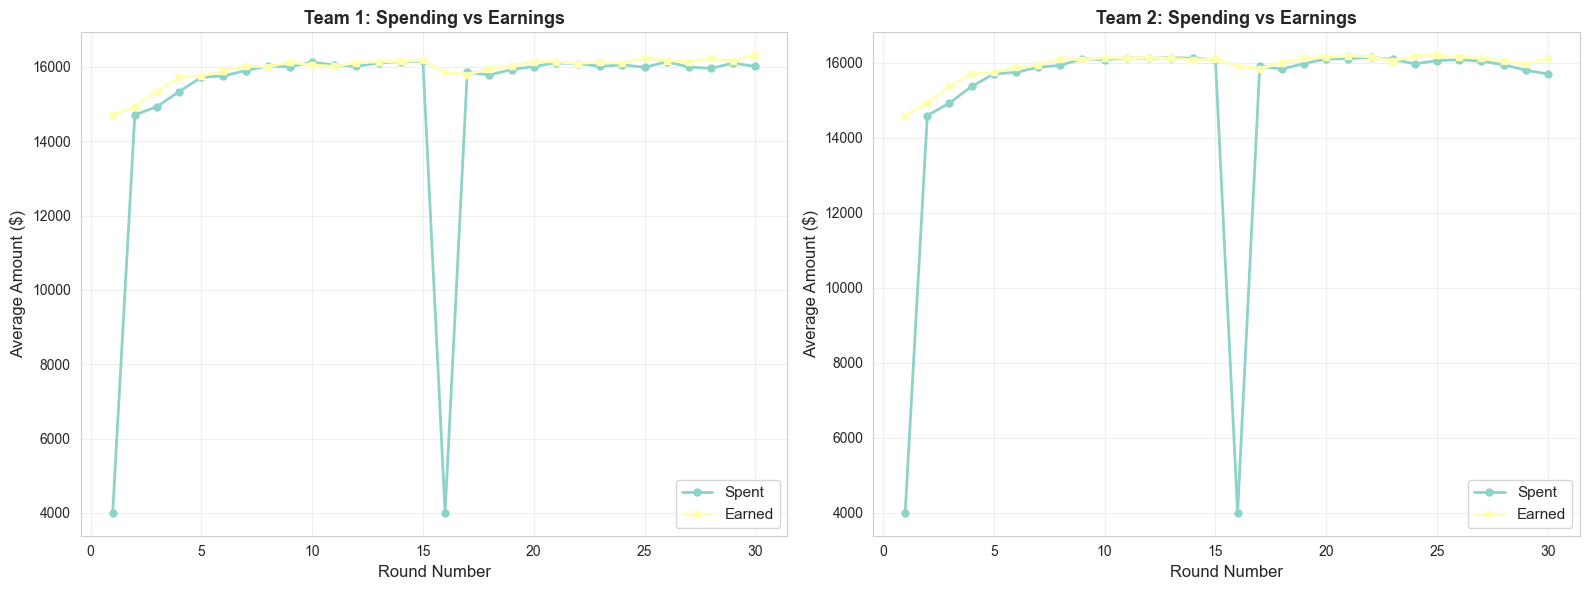

In [44]:
# Aggregate spending and earnings by round
round_econ = df_filtered.groupby('round_number').agg({
    't1_spent': 'mean',
    't1_earned': 'mean',
    't2_spent': 'mean',
    't2_earned': 'mean'
}).reset_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Team 1
ax1.plot(round_econ['round_number'], round_econ['t1_spent'], 
         marker='o', label='Spent', linewidth=2, markersize=5)
ax1.plot(round_econ['round_number'], round_econ['t1_earned'], 
         marker='s', label='Earned', linewidth=2, markersize=5)
ax1.set_xlabel('Round Number', fontsize=12)
ax1.set_ylabel('Average Amount ($)', fontsize=12)
ax1.set_title('Team 1: Spending vs Earnings', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Team 2
ax2.plot(round_econ['round_number'], round_econ['t2_spent'], 
         marker='o', label='Spent', linewidth=2, markersize=5)
ax2.plot(round_econ['round_number'], round_econ['t2_earned'], 
         marker='s', label='Earned', linewidth=2, markersize=5)
ax2.set_xlabel('Round Number', fontsize=12)
ax2.set_ylabel('Average Amount ($)', fontsize=12)
ax2.set_title('Team 2: Spending vs Earnings', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Visualization 4: Win Rate Analysis by Round

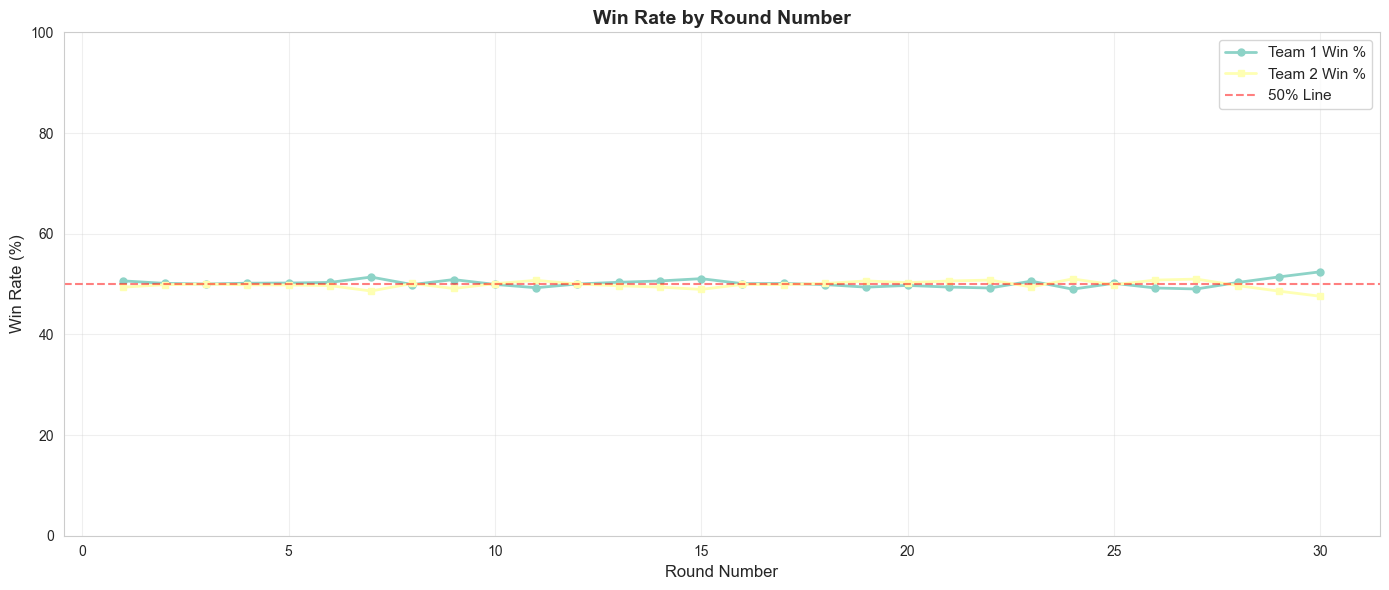

In [45]:
# Calculate win rates by round
win_rate = df_filtered.groupby('round_number').agg({
    'is_t1_winner': lambda x: (x.sum() / len(x)) * 100
}).reset_index()
win_rate.columns = ['round_number', 't1_win_rate']
win_rate['t2_win_rate'] = 100 - win_rate['t1_win_rate']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(win_rate['round_number'], win_rate['t1_win_rate'], 
         marker='o', label='Team 1 Win %', linewidth=2, markersize=5)
plt.plot(win_rate['round_number'], win_rate['t2_win_rate'], 
         marker='s', label='Team 2 Win %', linewidth=2, markersize=5)
plt.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% Line')

plt.xlabel('Round Number', fontsize=12)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.title('Win Rate by Round Number', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

## Calculate the amount of streaks and compare them to other simulated games and to real games. 

In [46]:
# Filter rows where consecutive losses are 0, and round number is neither > 2 nor 16 or 17
t1_winner_streak_reversal_data = df_filtered[
    (df_filtered['t1_consecutive_losses'] == 0) & 
    (df_filtered['t2_consecutive_losses'] == 1) & 
    (~df_filtered['round_number'].isin([1,  16 ]))
]

# Add rows where t1_consecutive_losses is 1 and t2_consecutive_losses is 0, excluding specific rounds
t2_winner_streak_reversal_data = df_filtered[
    (df_filtered['t1_consecutive_losses'] == 1) & 
    (df_filtered['t2_consecutive_losses'] == 0) & 
    (~df_filtered['round_number'].isin([1,  16 ]))
]

# Combine the filtered data
filtered_data = pd.concat([t1_winner_streak_reversal_data, t2_winner_streak_reversal_data], ignore_index=True)

print(f"Filtered rows: {len(filtered_data)}")
filtered_data

Filtered rows: 64069


,round_number,is_t1_winner,is_t1_ct,is_ot,outcome_reason_code,outcome_bomb_planted,t1_score_start,t1_score_end,t1_spent,t1_earned,...,t2_earned,t2_funds_start,t2_rs_eq,t2_fte_eq,t2_re_eq,t2_survivors,t2_consecutive_losses,t2_consecutive_wins,t2_loss_bonus_level,game_id
0,9,True,False,False,2,False,6,7,9500.0,17750.0,...,13200.0,17750.0,28535.0,46285.0,0.0,0,1,0,3,sim_6_20251123_114449_DPE1-2_1333
1,14,True,False,False,1,True,9,10,10400.0,19000.0,...,12900.0,17750.0,10219.0,27969.0,5143.0,1,1,0,3,sim_6_20251123_114449_DPE1-2_1333
2,19,True,True,False,4,False,12,13,10100.0,17750.0,...,12600.0,18400.0,12617.0,31017.0,0.0,0,1,0,3,sim_6_20251123_114449_DPE1-2_1333
3,5,True,False,False,1,True,1,2,16900.0,19000.0,...,7000.0,19300.0,14062.0,33362.0,6600.0,1,1,0,1,sim_12_20251123_114449_DPE1-2_6279
4,14,True,False,False,2,False,3,4,17000.0,17750.0,...,8200.0,17750.0,33754.0,51504.0,0.0,0,1,0,1,sim_12_20251123_114449_DPE1-2_6279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64064,24,False,False,False,3,True,11,11,17750.0,15300.0,...,19300.0,12300.0,1000.0,13300.0,0.0,0,0,1,2,sim_9973_20251123_114449_DPE1-2_5234
64065,7,False,True,False,2,True,2,2,17750.0,12900.0,...,18050.0,10100.0,1000.0,11100.0,12393.0,2,0,1,1,sim_9994_20251123_114449_DPE1-2_3381
64066,11,False,True,False,2,True,4,4,19300.0,12600.0,...,18050.0,15000.0,1000.0,16000.0,15122.0,3,0,1,1,sim_9994_20251123_114449_DPE1-2_3381
64067,17,False,False,False,3,True,7,7,17750.0,14700.0,...,19300.0,12600.0,1000.0,13600.0,7120.0,2,0,1,2,sim_9994_20251123_114449_DPE1-2_3381


### Further analysis of streak reversal


### Visualizations: Streak Break Patterns

In [47]:
""" # Streak length distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# T1 streaks
axes[0].hist([s[1] for s in streaks_t1], bins=range(1, max([s[1] for s in streaks_t1])+2), 
             alpha=0.6, color='blue', edgecolor='black', label='Win Streaks')
axes[0].hist([s[1] for s in streaks_t1 if s[2] == False], bins=range(1, max([s[1] for s in streaks_t1])+2), 
             alpha=0.6, color='red', edgecolor='black', label='Loss Streaks')
axes[0].set_xlabel('Streak Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('T1 Streak Length Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# T2 streaks
axes[1].hist([s[1] for s in streaks_t2], bins=range(1, max([s[1] for s in streaks_t2])+2), 
             alpha=0.6, color='blue', edgecolor='black', label='Win Streaks')
axes[1].hist([s[1] for s in streaks_t2 if s[2] == False], bins=range(1, max([s[1] for s in streaks_t2])+2), 
             alpha=0.6, color='red', edgecolor='black', label='Loss Streaks')
axes[1].set_xlabel('Streak Length')
axes[1].set_ylabel('Frequency')
axes[1].set_title('T2 Streak Length Distribution')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Economic state when streaks break
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# T1 - Funds when streak breaks
axes[0, 0].scatter([s[1] for s in streak_breaks_t1], [s[3] for s in streak_breaks_t1], 
                   c=['green' if s[2] else 'red' for s in streak_breaks_t1], alpha=0.6)
axes[0, 0].set_xlabel('Streak Length Before Break')
axes[0, 0].set_ylabel('Funds After Break')
axes[0, 0].set_title('T1: Funds When Streak Breaks')
axes[0, 0].grid(True, alpha=0.3)

# T1 - Equipment when streak breaks
axes[0, 1].scatter([s[1] for s in streak_breaks_t1], [s[4] for s in streak_breaks_t1], 
                   c=['green' if s[2] else 'red' for s in streak_breaks_t1], alpha=0.6)
axes[0, 1].set_xlabel('Streak Length Before Break')
axes[0, 1].set_ylabel('Equipment Value After Break')
axes[0, 1].set_title('T1: Equipment When Streak Breaks')
axes[0, 1].grid(True, alpha=0.3)

# T2 - Funds when streak breaks
axes[1, 0].scatter([s[1] for s in streak_breaks_t2], [s[3] for s in streak_breaks_t2], 
                   c=['green' if s[2] else 'red' for s in streak_breaks_t2], alpha=0.6)
axes[1, 0].set_xlabel('Streak Length Before Break')
axes[1, 0].set_ylabel('Funds After Break')
axes[1, 0].set_title('T2: Funds When Streak Breaks')
axes[1, 0].grid(True, alpha=0.3)

# T2 - Equipment when streak breaks
axes[1, 1].scatter([s[1] for s in streak_breaks_t2], [s[4] for s in streak_breaks_t2], 
                   c=['green' if s[2] else 'red' for s in streak_breaks_t2], alpha=0.6)
axes[1, 1].set_xlabel('Streak Length Before Break')
axes[1, 1].set_ylabel('Equipment Value After Break')
axes[1, 1].set_title('T2: Equipment When Streak Breaks')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show() """

" # Streak length distribution\nfig, axes = plt.subplots(1, 2, figsize=(14, 5))\n\n# T1 streaks\naxes[0].hist([s[1] for s in streaks_t1], bins=range(1, max([s[1] for s in streaks_t1])+2), \n             alpha=0.6, color='blue', edgecolor='black', label='Win Streaks')\naxes[0].hist([s[1] for s in streaks_t1 if s[2] == False], bins=range(1, max([s[1] for s in streaks_t1])+2), \n             alpha=0.6, color='red', edgecolor='black', label='Loss Streaks')\naxes[0].set_xlabel('Streak Length')\naxes[0].set_ylabel('Frequency')\naxes[0].set_title('T1 Streak Length Distribution')\naxes[0].legend()\naxes[0].grid(True, alpha=0.3)\n\n# T2 streaks\naxes[1].hist([s[1] for s in streaks_t2], bins=range(1, max([s[1] for s in streaks_t2])+2), \n             alpha=0.6, color='blue', edgecolor='black', label='Win Streaks')\naxes[1].hist([s[1] for s in streaks_t2 if s[2] == False], bins=range(1, max([s[1] for s in streaks_t2])+2), \n             alpha=0.6, color='red', edgecolor='black', label='Loss Strea

## Cumulative Distribution Functions (CDF)

Analyzing the cumulative distribution of key metrics separated by team

In [48]:
# Define the compute_cdf function
def compute_cdf(data):
	"""Compute the cumulative distribution function (CDF) for a given array."""
	sorted_data = np.sort(data)
	cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
	return sorted_data, cdf

# Separate data by team
df_t1 = filtered_data[filtered_data['is_t1_ct'] | filtered_data['is_t1_winner']].copy()  # T1 perspective
df_t2 = filtered_data[~filtered_data['is_t1_ct'] | ~filtered_data['is_t1_winner']].copy()  # T2 perspective

# Add the ratio of equipment values (t1_fte_eq / t2_fte_eq) to the filtered data
df_t1['equipment_ratio_t1_t2'] = df_t1['t1_fte_eq'] / df_t1['t2_fte_eq']
df_t2['equipment_ratio_t1_t2'] = df_t2['t1_fte_eq'] / df_t2['t2_fte_eq']

# Round number CDF
round_t1 = df_t1['round_number'].values
round_t2 = df_t2['round_number'].values  # Same for both, but we analyze separately

# FTE Equipment value CDF
fte_t1 = df_t1['t1_fte_eq'].values
fte_t2 = df_t2['t2_fte_eq'].values
# Outcome reason code CDF (for rounds won by each team)
outcome_t1 = df_t1[df_t1['is_t1_winner']]['outcome_reason_code'].values
outcome_t2 = df_t2[~df_t2['is_t1_winner']]['outcome_reason_code'].values


# Compute CDFs
round_t1_sorted, round_t1_cdf = compute_cdf(round_t1)
round_t2_sorted, round_t2_cdf = compute_cdf(round_t2)

fte_t1_sorted, fte_t1_cdf = compute_cdf(fte_t1)
fte_t2_sorted, fte_t2_cdf = compute_cdf(fte_t2)

equipment_ratio_t1_sorted, equipment_ratio_t1_cdf = compute_cdf(df_t1['equipment_ratio_t1_t2'].values)
equipment_ratio_t2_sorted, equipment_ratio_t2_cdf = compute_cdf(df_t2['equipment_ratio_t1_t2'].values)


print("CDF data computed for all metrics")

CDF data computed for all metrics


### CDF Visualizations

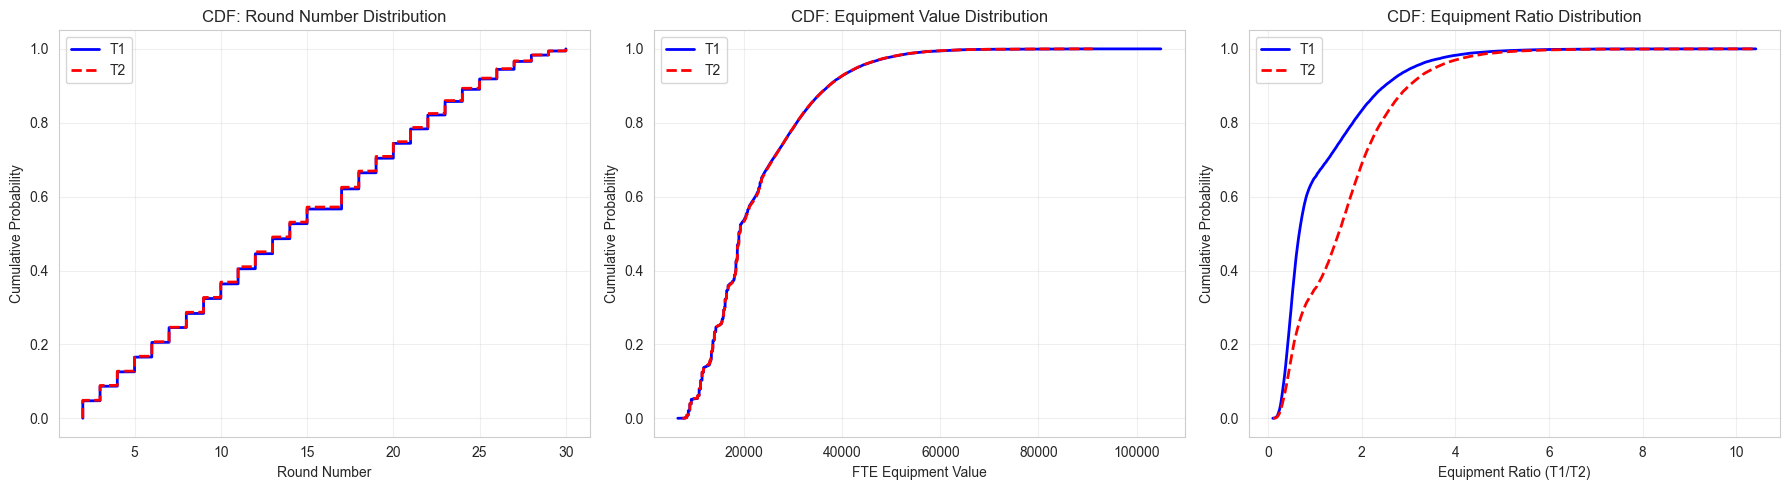

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# CDF 1: Round Number
axes[0].plot(round_t1_sorted, round_t1_cdf, label='T1', color='blue', linewidth=2)
axes[0].plot(round_t2_sorted, round_t2_cdf, label='T2', color='red', linewidth=2, linestyle='--')
axes[0].set_xlabel('Round Number')
axes[0].set_ylabel('Cumulative Probability')
axes[0].set_title('CDF: Round Number Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# CDF 2: FTE Equipment Value
axes[1].plot(fte_t1_sorted, fte_t1_cdf, label='T1', color='blue', linewidth=2)
axes[1].plot(fte_t2_sorted, fte_t2_cdf, label='T2', color='red', linewidth=2, linestyle='--')
axes[1].set_xlabel('FTE Equipment Value')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title('CDF: Equipment Value Distribution')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# CDF 3: Equipment Ratio#
equipment_ratio_t1 = df_t1['equipment_ratio_t1_t2'].values
equipment_ratio_t2 = df_t2['equipment_ratio_t1_t2'].values



axes[2].plot(equipment_ratio_t1_sorted, equipment_ratio_t1_cdf, label='T1', color='blue', linewidth=2)
axes[2].plot(equipment_ratio_t2_sorted, equipment_ratio_t2_cdf, label='T2', color='red', linewidth=2, linestyle='--')
axes[2].set_xlabel('Equipment Ratio (T1/T2)')
axes[2].set_ylabel('Cumulative Probability')
axes[2].set_title('CDF: Equipment Ratio Distribution')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### CDF Interpretation

**Round Number CDF**: Shows how rounds are distributed throughout the game. Steep rises indicate common round numbers (e.g., round 15/16 for half-time, round 30 for regulation end).

**FTE Equipment Value CDF**: Reveals the distribution of economic states. Plateaus indicate common equipment value ranges (e.g., full buys, eco rounds).

**Outcome Reason Code CDF**: Shows the distribution of how rounds are won. Different codes represent:
- Elimination
- Bomb detonation
- Bomb defusal
- Time expiration
- Other win conditions

In [50]:
# Streak Break Analysis: When do winning streaks get broken?

# Calculate streak length before break for each team
def analyze_streak_breaks(df):
    """Analyze when winning streaks are most likely to be broken"""
    streak_breaks = []
    
    for game_id in df['game_id'].unique():
        game_data = df[df['game_id'] == game_id].sort_values('round_number')
        
        for idx in range(1, len(game_data)):
            current = game_data.iloc[idx]
            
            # Team 1 streak broken
            if current['t1_consecutive_wins'] == 0 and current['t1_consecutive_losses'] == 1:
                prev_wins = game_data.iloc[idx-1]['t1_consecutive_wins']
                if prev_wins > 0:
                    streak_breaks.append({
                        'team': 'Team 1',
                        'streak_length': prev_wins,
                        'round_number': current['round_number'],
                        'funds_start': current['t1_funds_start'],
                        'fte_eq': current['t1_fte_eq'],
                        'opponent_fte_eq': current['t2_fte_eq']
                    })
            
            # Team 2 streak broken
            if current['t2_consecutive_wins'] == 0 and current['t2_consecutive_losses'] == 1:
                prev_wins = game_data.iloc[idx-1]['t2_consecutive_wins']
                if prev_wins > 0:
                    streak_breaks.append({
                        'team': 'Team 2',
                        'streak_length': prev_wins,
                        'round_number': current['round_number'],
                        'funds_start': current['t2_funds_start'],
                        'fte_eq': current['t2_fte_eq'],
                        'opponent_fte_eq': current['t1_fte_eq']
                    })
    
    return pd.DataFrame(streak_breaks)

streak_breaks_df = analyze_streak_breaks(df_filtered)

print(f"Total streak breaks analyzed: {len(streak_breaks_df)}")
print(f"\nStreak break distribution by length:")
print(streak_breaks_df['streak_length'].value_counts().sort_index())

# Summary statistics
print(f"\n{'='*60}")
print("STREAK BREAK ANALYSIS SUMMARY")
print(f"{'='*60}")
print(f"Average streak length before break: {streak_breaks_df['streak_length'].mean():.2f}")
print(f"Median streak length before break: {streak_breaks_df['streak_length'].median():.0f}")
print(f"Max streak length observed: {streak_breaks_df['streak_length'].max():.0f}")
print(f"Most common streak length before break: {streak_breaks_df['streak_length'].mode().values[0]}")
print(f"\nAverage round when streak breaks: {streak_breaks_df['round_number'].mean():.2f}")
print(f"{'='*60}")



Total streak breaks analyzed: 68472

Streak break distribution by length:
streak_length
1     21844
2     15307
3     11023
4      7734
5      5018
6      3080
7      1773
8      1110
9       657
10      391
11      211
12      160
13       90
14       46
15       28
Name: count, dtype: int64

STREAK BREAK ANALYSIS SUMMARY
Average streak length before break: 2.89
Median streak length before break: 2
Max streak length observed: 15
Most common streak length before break: 1

Average round when streak breaks: 14.33


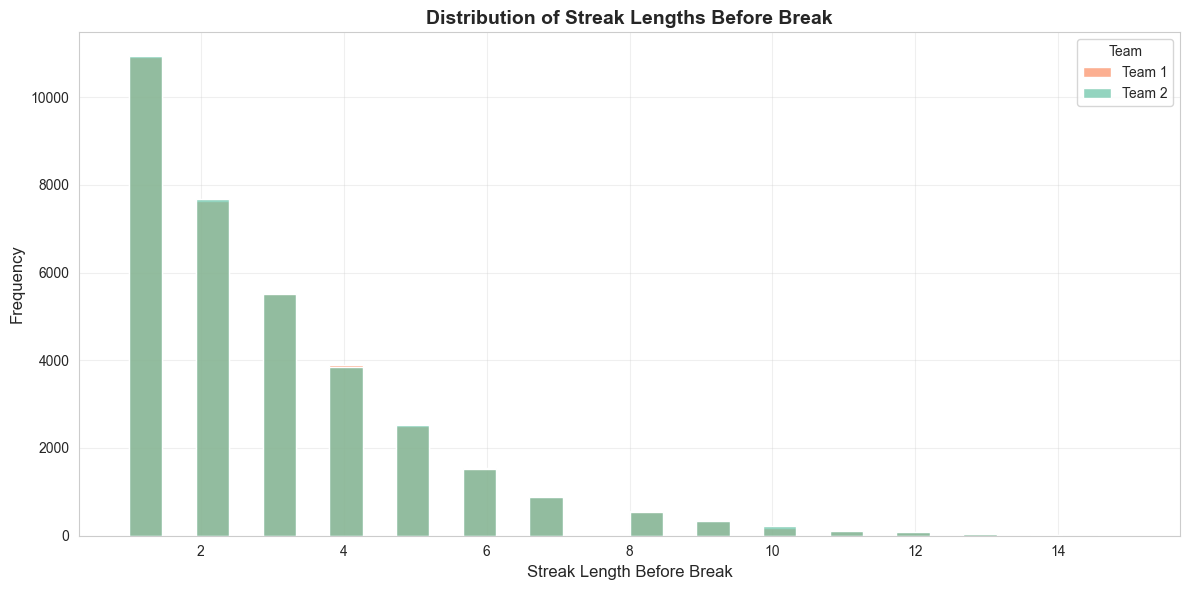

In [51]:
# Plot streak length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=streak_breaks_df, x='streak_length', hue='team', bins=30, kde=False, palette='Set2', alpha=0.7)

plt.title('Distribution of Streak Lengths Before Break', fontsize=14, fontweight='bold')
plt.xlabel('Streak Length Before Break', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Team', fontsize=10, labels=['Team 1', 'Team 2'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Framework Extension Area

Add your custom analysis and visualizations below:

In [52]:
# Custom analysis cell 2
# Add your code here
pass

## Export Analysis Results (Optional)

In [53]:
# Uncomment to export aggregated data
# round_agg.to_csv('analysis_results_by_round.csv', index=False)
# print("Analysis results exported successfully")